In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
df = pd.read_csv('/content/drive/MyDrive/TV Sale/Date and model wise sale.csv')
df.head()

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57


In [68]:
df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [69]:
df['Date'].unique()

array(['31-Aug-16', '30-Aug-16', '29-Aug-16', '28-Aug-16', '27-Aug-16',
       '26-Aug-16', '25-Aug-16', '24-Aug-16', '23-Aug-16', '22-Aug-16',
       '21-Aug-16', '20-Aug-16', '19-Aug-16', '18-Aug-16', '17-Aug-16',
       '16-Aug-16', '15-Aug-16', '14-Aug-16', '13-Aug-16', '12-Aug-16',
       '11-Aug-16', '10-Aug-16', '09-Aug-16', '08-Aug-16', '07-Aug-16',
       '06-Aug-16', '05-Aug-16', '04-Aug-16', '03-Aug-16', '02-Aug-16',
       '01-Aug-16', '31-Jul-16', '30-Jul-16', '29-Jul-16', '28-Jul-16',
       '27-Jul-16', '26-Jul-16', '25-Jul-16', '24-Jul-16', '23-Jul-16',
       '22-Jul-16', '21-Jul-16', '20-Jul-16', '19-Jul-16', '18-Jul-16',
       '17-Jul-16', '16-Jul-16', '15-Jul-16', '14-Jul-16', '13-Jul-16',
       '12-Jul-16', '11-Jul-16', '10-Jul-16', '09-Jul-16', '08-Jul-16',
       '07-Jul-16', '06-Jul-16', '05-Jul-16', '04-Jul-16', '03-Jul-16',
       '02-Jul-16', '01-Jul-16', '30-Jun-16', '29-Jun-16', '28-Jun-16',
       '27-Jun-16', '26-Jun-16', '25-Jun-16', '24-Jun-16', '23-J

In [70]:
df['Date'].value_counts()

08-Aug-16    99
14-Aug-16    95
04-Aug-16    94
19-Aug-16    94
17-Aug-16    94
             ..
14-Jan-14     2
04-Jan-14     2
19-Jan-14     2
03-Jan-14     1
12-Jan-14     1
Name: Date, Length: 971, dtype: int64

In [71]:
cols = df.columns
(df[cols] == 0).all()

Date     False
Model    False
Count    False
dtype: bool

In [72]:
df = df.fillna(0)
df.head()

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57


In [73]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Model,Count
0,2016-08-31,M45,5
1,2016-08-31,M121,3
2,2016-08-31,M122,4
3,2016-08-31,M91,10
4,2016-08-31,M66,57


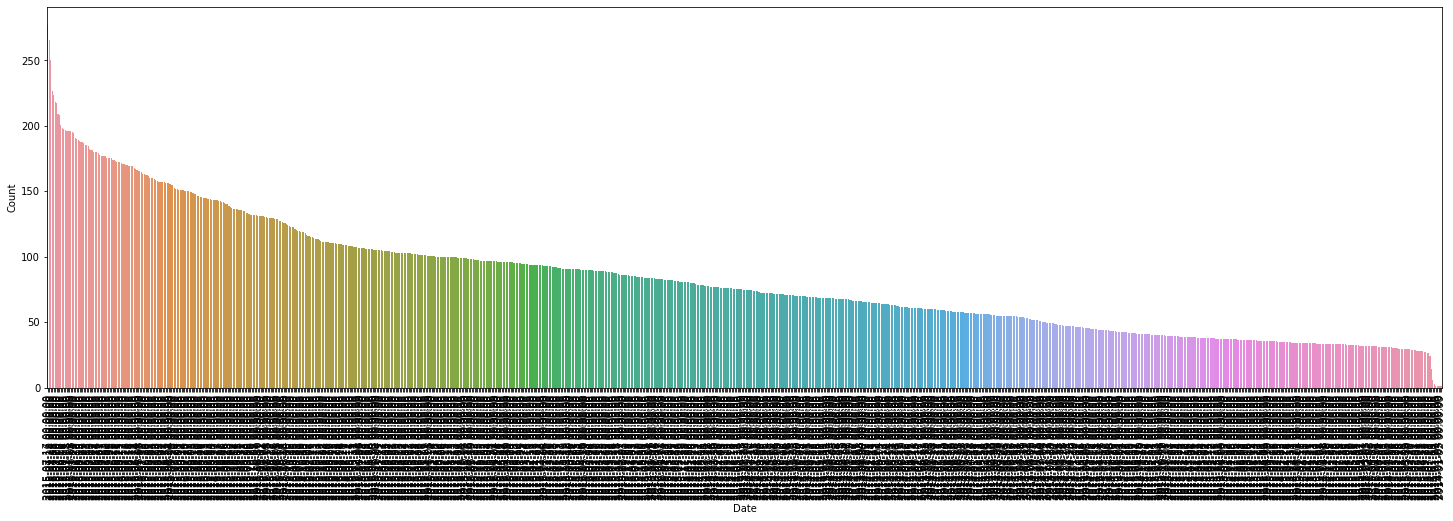

In [90]:
datawise = df.groupby('Date').Count.mean().sort_values(ascending =False)
datewise = pd.DataFrame(datawise)
plt.figure(figsize=(25,7))
g=sns.barplot(x = datewise.index, y= 'Count', data = datewise)
for item in g.get_xticklabels():
    item.set_rotation(90)

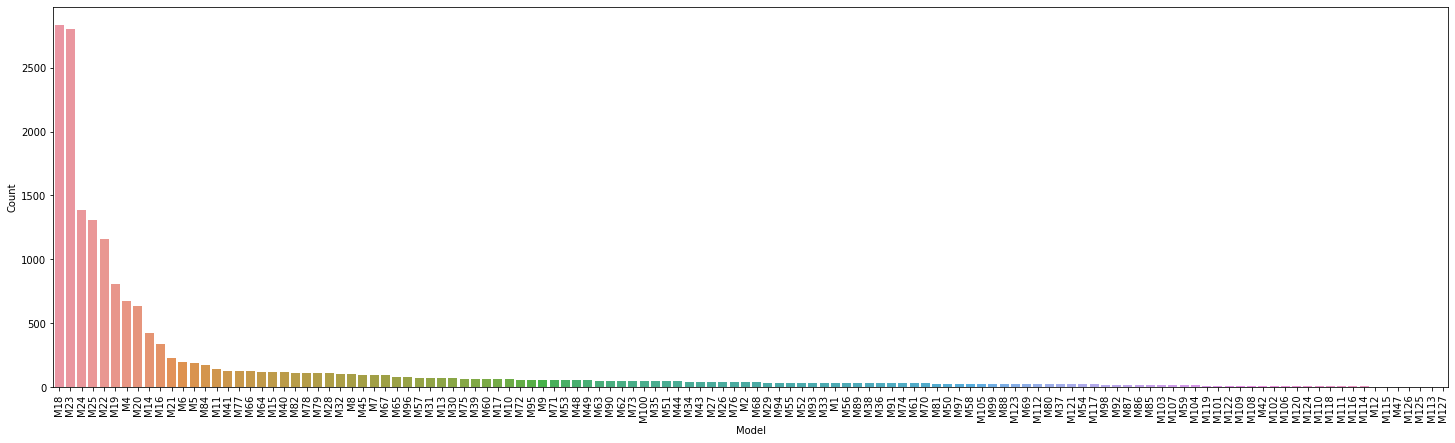

In [94]:
modelwise = df.groupby('Model').Count.mean().sort_values(ascending =False)
modelwise = pd.DataFrame(modelwise)
plt.figure(figsize=(25,7))
g=sns.barplot(x = modelwise.index, y= 'Count', data = modelwise)
for item in g.get_xticklabels():
    item.set_rotation(90)

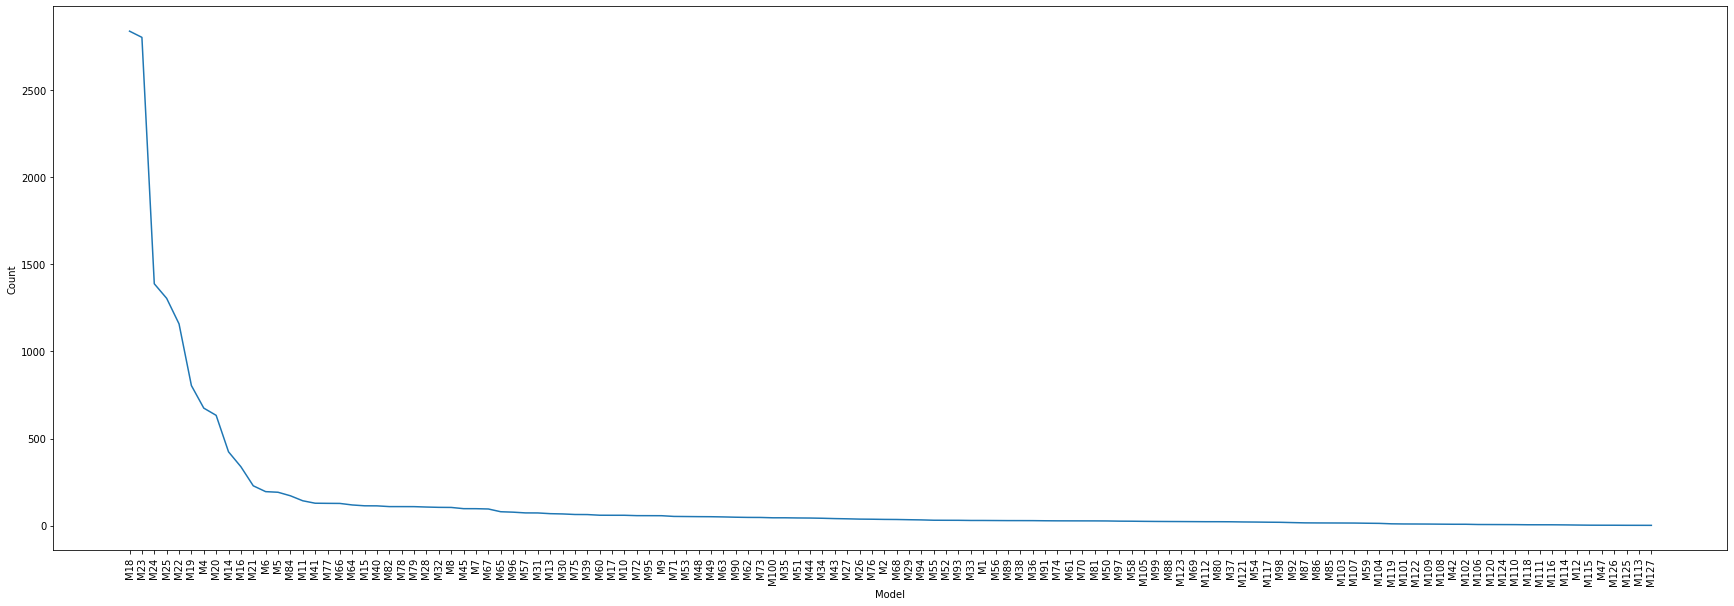

In [97]:
plt.figure(figsize=(30,10))
g = sns.lineplot(x=datewise.index, y = 'Count', data = datewise)
for item in g.get_xticklabels():
    item.set_rotation(90)

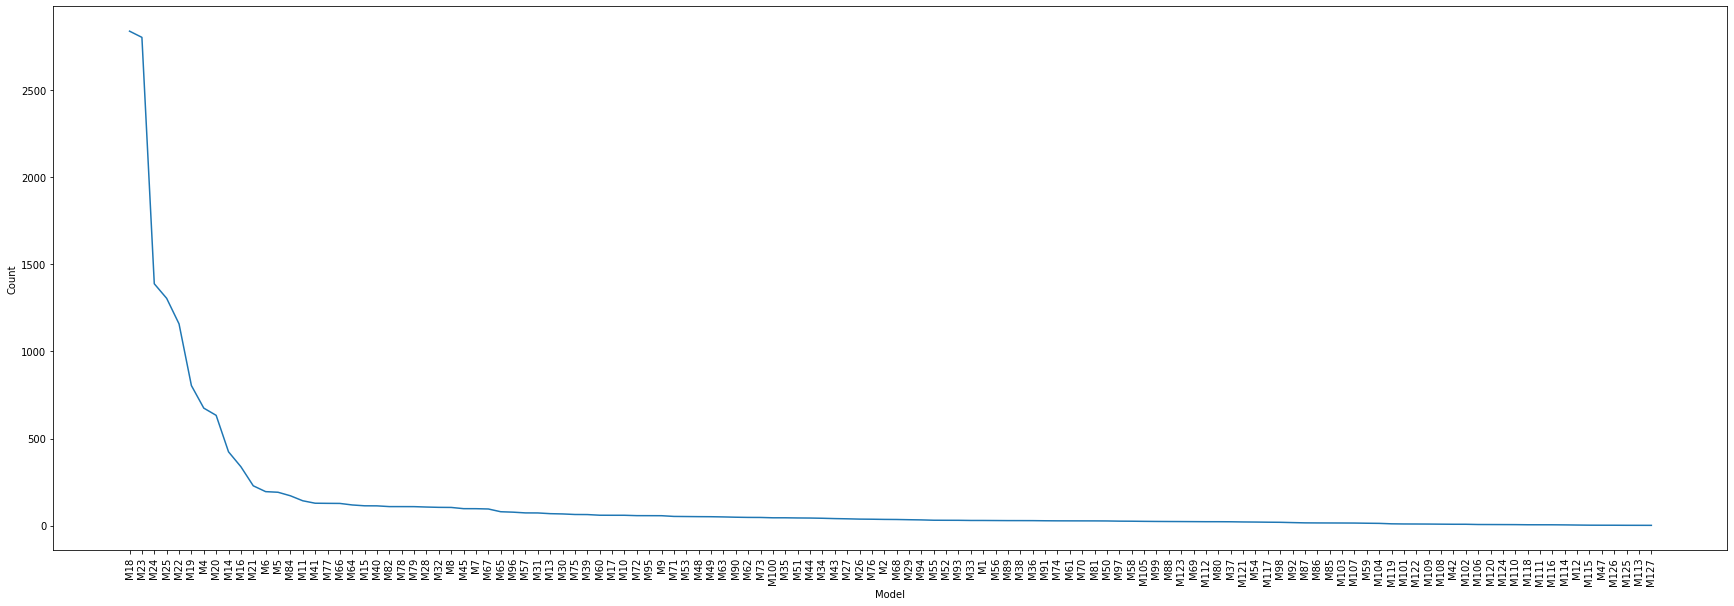

In [98]:
plt.figure(figsize=(30,10))
h = sns.lineplot(x=modelwise.index, y = 'Count', data = modelwise)
for item in h.get_xticklabels():
    item.set_rotation(90)

In [83]:
data = df.iloc[:,1:].values
Datea = df['Date'].values
print(data)

[['M45' 5]
 ['M121' 3]
 ['M122' 4]
 ...
 ['M60' 5]
 ['M54' 1]
 ['M58' 1]]


In [75]:

labelencoder_X= LabelEncoder()
data[:,1]=labelencoder_X.fit_transform(data[:,1])




In [76]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')
data=onehotencoder.fit_transform(data).toarray()
print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [77]:
x_train, x_test, y_train, y_test = train_test_split(data, Datea, shuffle=True, train_size = 0.75)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(34587, 1315) (11529, 1315) (34587,) (11529,)


In [78]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
reg.coef_

array([-1.37800746e+16,  1.05427444e+16,  2.60562461e+16, ...,
        1.79184216e+15, -1.07694268e+16, -1.07118268e+16])

In [80]:
reg.intercept_

1.4382133934899218e+18